In [1]:
import collections
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class Graph:
    def __init__(self,x):
        self.Vertices = x
        self.Weight = collections.defaultdict(int)
        self.LinkedList = collections.defaultdict(set)
        self.Edges = x-1
        for i in range(x-1):
            self.LinkedList[i].add(i+1)
            self.LinkedList[i+1].add(i)
            _w = random.randrange(1,100) 
            self.Weight[tuple([i,i+1])] = _w
            self.Weight[tuple([i+1,i])] = _w

    def sparse_graph(self):
        total_edges = self.Vertices*3
        #print(total_edges)
        while self.Edges < total_edges:
            v = random.randrange(self.Vertices)
            w = random.randrange(self.Vertices)
            if v != w and w not in self.LinkedList[v]:
                #print(v,w)
                self.LinkedList[v].add(w)
                self.LinkedList[w].add(v)
                self.Edges +=1
                #print(self.Edges)
                _w = random.randrange(1,100) 
                self.Weight[tuple([v,w])] = _w
                self.Weight[tuple([w,v])] = _w
                    
    def dense_graph(self):
        for v in range(self.Vertices):
            for w in range(v+1,self.Vertices):
                if w not in self.LinkedList[v] and random.uniform(0,1)<=0.2:
                    self.LinkedList[v].add(w)
                    self.LinkedList[w].add(v)
                    self.Edges +=1    
                    _w = random.randrange(1,100) 
                    self.Weight[tuple([v,w])] = _w
                    self.Weight[tuple([w,v])] = _w

In [3]:
g1_d = Graph(5000)
g1_d.dense_graph()

g2_d = Graph(5000)
g2_d.dense_graph()

g3_d = Graph(5000)
g3_d.dense_graph()

g4_d = Graph(5000)
g4_d.dense_graph()

g5_d = Graph(5000)
g5_d.dense_graph()

In [4]:
dense_graphs = [g1_d,g2_d,g3_d,g4_d,g5_d]

In [28]:
class MaxHeap_locate:
    def __init__(self,items = []):
        super().__init__() # calling parent __init__
        self.heap = [(0,-1)]
        self.locate = [-1]*50000
        for i in items:
            self.heap.append(i)
            self.__floatUp(len(self.heap)-1)
            
    def push(self, data):
        self.heap.append(data)
        self.locate[data[1]]=len(self.heap)-1
        self.__floatUp(len(self.heap) - 1)
        
    def peek(self):
        if self.heap[1]:
            return self.heap[1]
        else:
            return False
            
    def pop(self):
        if len(self.heap)>2:
            self.__swap(1,len(self.heap)-1)
            max = self.heap.pop() # remove the last on the list
            self.__bubbleDown(1)
            
        elif len(self.heap) ==2:
            max = self.heap.pop()
        else:
            max = False
        return max
    
    def delete(self,w):
        i = self.locate[w]
        self.__swap(i,len(self.heap)-1)
        self.heap.pop()
        self.__bubbleDown(i)     
        
    def __swap(self,i,j): # __internal functions
        self.locate[self.heap[i][1]],self.locate[self.heap[j][1]]=self.locate[self.heap[j][1]],self.locate[self.heap[i][1]]
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]
        
    
    def __floatUp(self,index):
        parent = index//2 # '//' floor division
        if index <= 1:
            return
        elif self.heap[index][0]>self.heap[parent][0]:
            self.__swap(index,parent)
            self.__floatUp(parent)
        
    def __bubbleDown(self, index):
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)

In [26]:
def MaxHeap_Dijkstra(g1,s,t):
    status =[0]*g1.Vertices
    bw = [0]*g1.Vertices
    dad = [-1]*g1.Vertices
    for i in range(g1.Vertices):
        status[i]='unseen'
    status[s] = 'intree'
    bw[s] = 9999
    H = MaxHeap_locate()
    for v in g1.LinkedList[s]:
        status[v] = 'fringe'
        bw[v] = g1.Weight[s,v]
        dad[v] = s
        H.push((bw[v],v))
    while H.heap!=[(0,-1)]:
            v = H.peek()[1]
            H.pop()
            status[v] = 'intree'
            if v ==t:
                return bw[v]
            for w in g1.LinkedList[v]:
                if status[w]=='unseen':
                    status[w] = 'fringe'
                    dad[w]=v
                    bw[w]=min(bw[v],g1.Weight[v,w])
                    H.push((bw[w],w))
                elif status[w]=='fringe' and bw[w]<min(bw[v],g1.Weight[v,w]):
                    H.delete(w)
                    dad[w]=v
                    bw[w]=min(bw[v],g1.Weight[v,w])
                    H.push((bw[w],w))

The average running time is 12.10487247467041 seconds


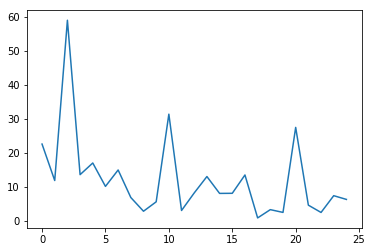

In [29]:
time_list = []
for g in dense_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        #print(s,t)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = MaxHeap_Dijkstra(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
        #print(i)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

In [30]:
class HeapSort:
    def __init__(self,items = []):
        super().__init__() # calling parent __init__
        self.heap = [(0,-1,-1)]
        for i in items:
            self.heap.append(i)
            self.__floatUp(len(self.heap)-1)
            
    def push(self, data):
        self.heap.append(data)
        self.__floatUp(len(self.heap) - 1)
        
    def peek(self):
        if self.heap[1]:
            return self.heap[1]
        else:
            return False
            
    def pop(self):
        if len(self.heap)>2:
            self.__swap(1,len(self.heap)-1)
            max = self.heap.pop() # remove the last on the list
            self.__bubbleDown(1)
            
        elif len(self.heap) ==2:
            max = self.heap.pop()
        else:
            max = False
        return max
  
    def __swap(self,i,j): # __internal functions
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]
    
    def __floatUp(self,index):
        parent = index//2 # '//' floor division
        if index <= 1:
            return
        elif self.heap[index][0]>self.heap[parent][0]:
            self.__swap(index,parent)
            self.__floatUp(parent)
        
    def __bubbleDown(self, index):
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)

In [31]:
def Find(v,P):
    cur = v
    while P[cur]!=-1:
        cur = P[cur]
    return cur
def Union(r1,r2,P,rank):
    if rank[r1]>rank[r2]:
        P[r2]=r1
    elif rank[r1]<rank[r2]:
        P[r1]=r2
    else:
        P[r1]=r2
        rank[r2]=rank[r2]+1

In [32]:
def DFS_main(T,s,g1,t):
    dad = [-1]*g1.Vertices
    visited=[False]*g1.Vertices
    MBP = [0]*g1.Vertices
    MBP[s]=9999
    DFS(T,s,visited,dad,g1,MBP,t)
    #print (MBP)
    return MBP[t]

def DFS(T,v,visited,dad,g1,MBP,t):
    visited[v]=True
    for w in T[v]:
        if visited[w]==False:
            #print(visited)
            dad[w]=v
            MBP[w]=min(MBP[v],g1.Weight[w,v])
            if w ==t:
                return MBP[w]
            else:
                DFS(T,w,visited,dad,g1,MBP,t)

In [33]:
def Kruskal(g1,s,t):
    hs = HeapSort()
    for pair in g1.Weight:
        if pair[0]< pair[1]:
            _w = g1.Weight[pair[0],pair[1]]
            hs.push((_w,pair[0],pair[1]))
    #Make set v
    P = [-1]*g1.Vertices
    rank = [0]*g1.Vertices
    T = collections.defaultdict(set)
    while hs.heap != [(0,-1,-1)]:
        ei = hs.pop()
        ui,vi = ei[1],ei[2]
        r1 = Find(ui,P)
        r2 = Find(vi,P)
        if r1!=r2:
            Union(r1,r2,P,rank)
            T[ui].add(vi)
            T[vi].add(ui)
    mbp= DFS_main(T,1,g1,5)
    return mbp

2037 4148
2569 1628
2321 291
4207 256
1755 217
The average running time is 125.92616386413575 seconds


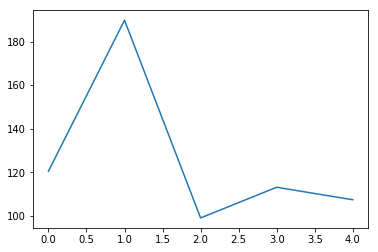

In [35]:
time_list = []
for g in dense_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        print(s,t)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = Kruskal(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
        #print(i)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

In [ ]:
'''def BFS(T,s):
    dad = [-1]*g1.Vertices
    visited=[False]*g1.Vertices
    queue = collections.deque()
    visited[s]=True
    for w in T[s]:
        visited[w]=True
        queue.append(w)
        dad[w]=s
    while queue:
        print(visited)
        v = queue.popleft()
        for w in T[v]:
            if visited[w]==False:
                visited[w]=True
                queue.append(w)
                dad[w]=v
    return dad
'''